In [1]:
!pip install tensorflow numpy matplotlib scikit-learn panda

Defaulting to user installation because normal site-packages is not writeable


## Import Library

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [4]:
data1 = pd.read_csv('Crop data/Crop_recommendation.csv')

In [5]:
merged_data = data1

In [6]:
merged_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Labeling Data

In [23]:
label = merged_data['label'].unique()

In [8]:
X = merged_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = merged_data['label']

In [9]:
y_encoded = pd.get_dummies(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Create Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

c:\laragon\bin\python\python-3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,318 (12.96 KB)

 Trainable params: 3,318 (12.96 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2548 - loss: 2.7711 - val_accuracy: 0.7068 - val_loss: 1.4674
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6471 - loss: 1.2544 - val_accuracy: 0.8614 - val_loss: 0.6314
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8033 - loss: 0.6546 - val_accuracy: 0.9159 - val_loss: 0.3873
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8499 - loss: 0.4711 - val_accuracy: 0.9227 - val_loss: 0.2948
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - loss: 0.3808 - val_accuracy: 0.9455 - val_loss: 0.2218
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9101 - loss: 0.2933 - val_accuracy: 0.9432 - val_loss: 0.1940
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2733 - val_accuracy: 0.9500 - val_loss: 0.1715
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.9377 - loss: 0.2084 - val_accuracy

## Plot Accuracy and Loss

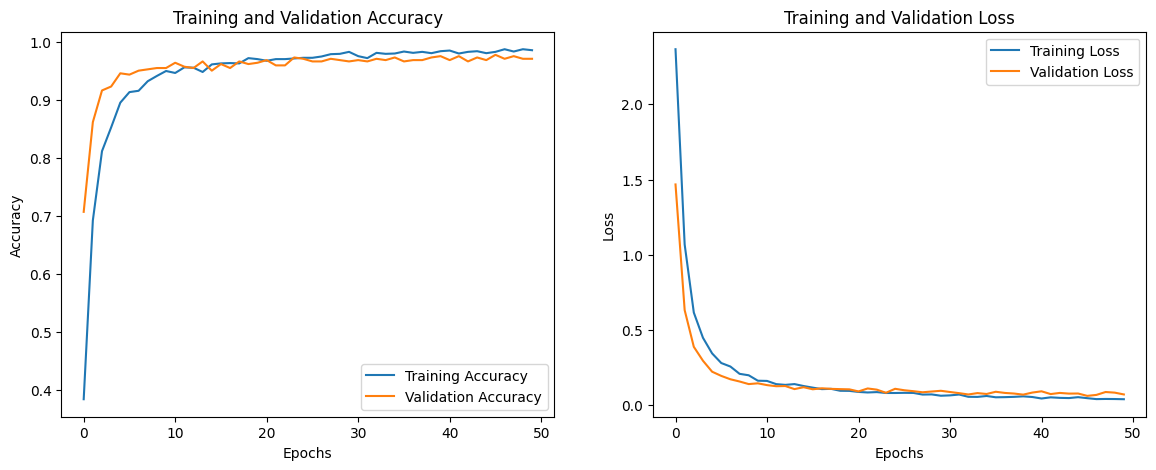

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test Model

In [21]:
new_data = pd.DataFrame([{
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20.5,
    "humidity": 80.2,
    "ph": 6.5,
    "rainfall": 200.4
}])

predictions = model.predict(new_data)
predicted_class = np.argmax(predictions, axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [24]:
label[predicted_class]

array(['papaya'], dtype=object)

## TF LITE

In [18]:
export_dir = 'saved_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/1\assets


INFO:tensorflow:Assets written to: saved_model/1\assets


In [19]:
mode = "Speed"

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [20]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimizations (e.g., for size reduction and performance)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [21]:
import pathlib

tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)

3752

## Saved Keras Model

In [23]:
model.save("SavedModel/Crop/model.h5")
# model.save("saved_model/my_model")

## TF JS

In [ ]:
%pip install tensorflowjs

In [ ]:
import subprocess

subprocess.run(['where tensorflowjs_converter'])

In [ ]:
import subprocess

subprocess.run([
    "tensorflowjs_converter",
    "--input_format=keras",
    "SavedModel\\crop\\model.h5",
    "SavedModel\\crop"
])